In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset (replace 'data.csv' with your actual file path)
df = pd.read_csv('output.csv')
df['date'] = pd.to_datetime(df['date'], format = "%d-%m-%Y")

# Display the first few rows and basic information about the dataset
print(df.info())
print("\nGeneral Statistics:")
print(df.describe())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2207 entries, 0 to 2206
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   sno                 2207 non-null   int64         
 1   author              2207 non-null   object        
 2   content             2207 non-null   object        
 3   date                2207 non-null   datetime64[ns]
 4   highlighted_review  2207 non-null   object        
 5   improvements        2207 non-null   object        
 6   negative_parts      235 non-null    object        
 7   neutral_parts       119 non-null    object        
 8   positive_parts      1862 non-null   object        
 9   probabilities       2207 non-null   object        
 10  product             2207 non-null   object        
 11  rating              2207 non-null   int64         
 12  sentiment           2207 non-null   object        
 13  title               2207 non-null   object      

,sno,author,content,date,highlighted_review,improvements,negative_parts,neutral_parts,positive_parts,probabilities,product,rating,sentiment,title,category
0,1347,davidavi_967,beast,2020-09-01,beast,[],NaN,NaN,beast,"{'Negative': '0.04', 'Neutral': '0.04', 'Posit...","Intel Core i7-11700K Processor (5 GHz, 8 Cores...",5,Positive,absalute monster winnin,i7
1,589,Derek Keene,chose processor gaming build paired rtx couldn...,2023-03-01,chose processor gaming build paired rtx couldn...,[],NaN,NaN,chose processor gaming build paired rtx couldn...,"{'Negative': '0.00', 'Neutral': '0.00', 'Posit...",Intel Core i5-13600KF Desktop Processor 14 cor...,5,Positive,absolute beast,i5
2,266,Ranny,price performance offer great issue handling p...,2023-08-01,price performance offer great issue handling p...,[],NaN,NaN,price performance offer great issue handling p...,"{'Negative': '0.00', 'Neutral': '0.00', 'Posit...",Intel Core i5-12600K Desktop Processor with In...,5,Positive,absolute beast cpu,i5
3,479,Shelley,youaaaaaare looking gamingonly processor youaa...,2023-04-01,youaaaaaare looking gamingonly processor youaa...,[],NaN,NaN,youaaaaaare looking gamingonly processor youaa...,"{'Negative': '0.00', 'Neutral': '0.00', 'Posit...",Intel Core i7-13700K Gaming Desktop Processor ...,5,Positive,absolute beastgaming overkill,i7
4,1167,uaspilot,needed fill motherboard,2021-12-01,needed fill motherboard,[],needed fill motherboard,NaN,NaN,"{'Negative': '1.00', 'Neutral': '0.00', 'Posit...","Intel Core i9-11900K Processor (5.3 GHz, 8 Cor...",5,Negative,absolute best processor machine,i9


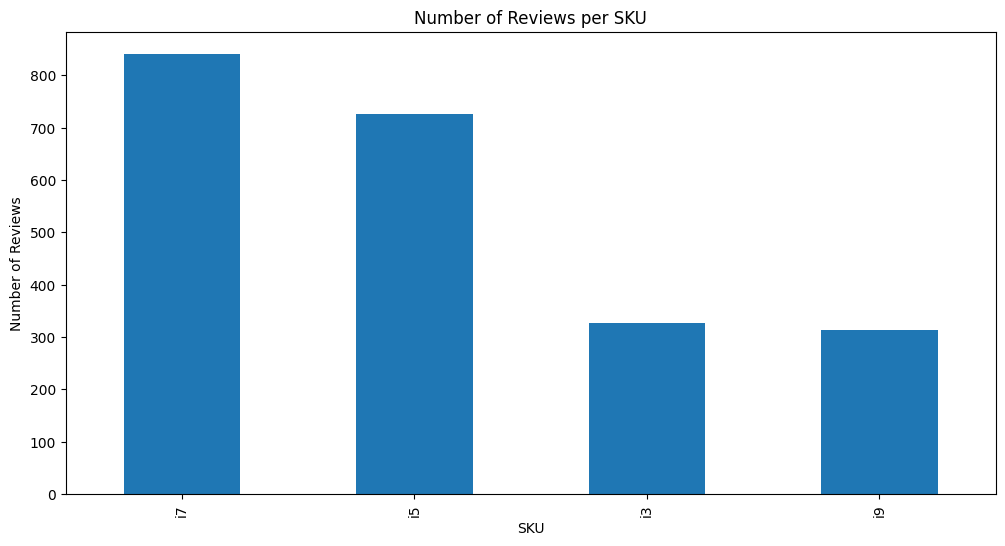

In [12]:
sku_counts = df['category'].value_counts()
plt.figure(figsize=(12, 6))
sku_counts.plot(kind='bar')
plt.title('Number of Reviews per SKU')
plt.xlabel('SKU')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=90)
plt.show()


In [13]:
# Check for missing values
print(df.isnull().sum())

# Convert data types (if needed)
df['rating'] = df['rating'].astype(int)  # Example: convert 'rating' column to integer

sno                      0
author                   0
content                  0
date                     0
highlighted_review       0
improvements             0
negative_parts        1972
neutral_parts         2088
positive_parts         345
probabilities            0
product                  0
rating                   0
sentiment                0
title                    0
category                 0
dtype: int64


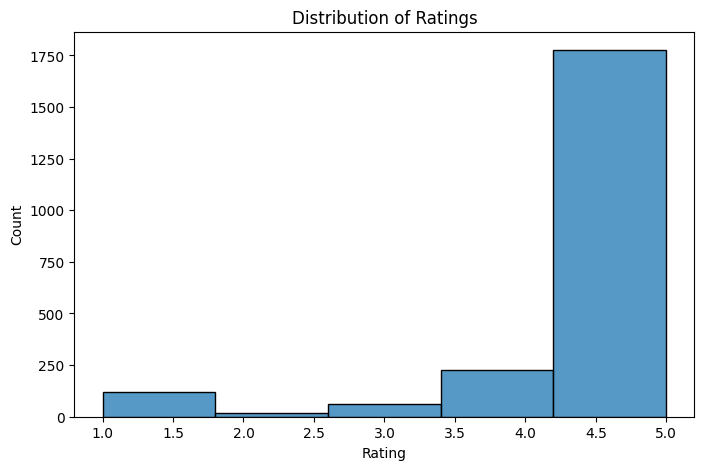

In [14]:
import seaborn as sns

# Histogram of ratings
plt.figure(figsize=(8, 5))
sns.histplot(df['rating'], bins=5, kde=False)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()


In [22]:
import spacy

# Loading model
nlp = spacy.load('en_core_web_sm',disable=['parser', 'ner'])

# Lemmatization with stopwords removal
df['lemmatized']=df['content'].apply(lambda x: ' '.join([token.lemma_ for token in list(nlp(x)) if (token.is_stop==False)]))
df_grouped=df[['category','lemmatized']].groupby(by='category').agg(lambda x:' '.join(x))
df_grouped.head()

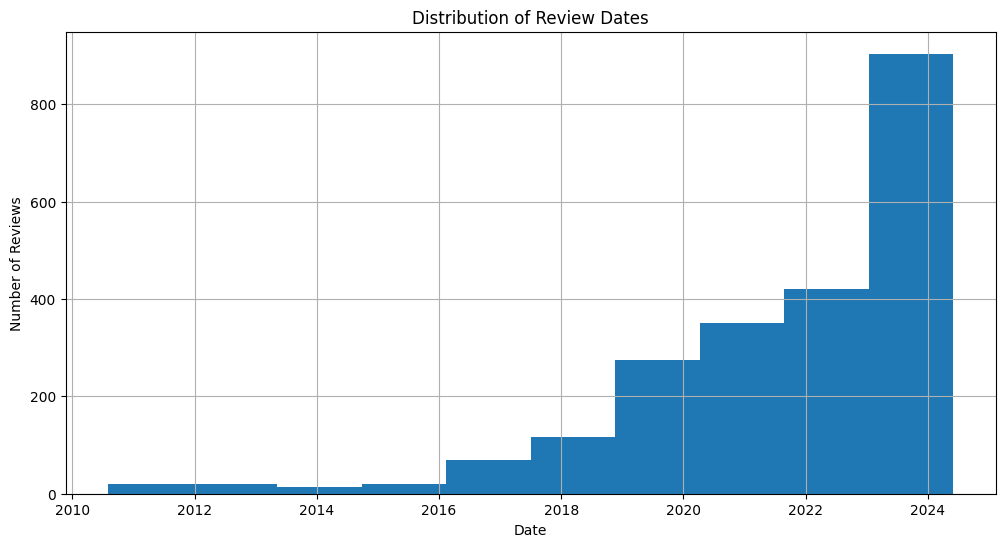

In [17]:
# Distribution of review dates
plt.figure(figsize=(12, 6))
df['date'].hist(bins=10)
plt.title('Distribution of Review Dates')
plt.xlabel('Date')
plt.ylabel('Number of Reviews')
plt.show()


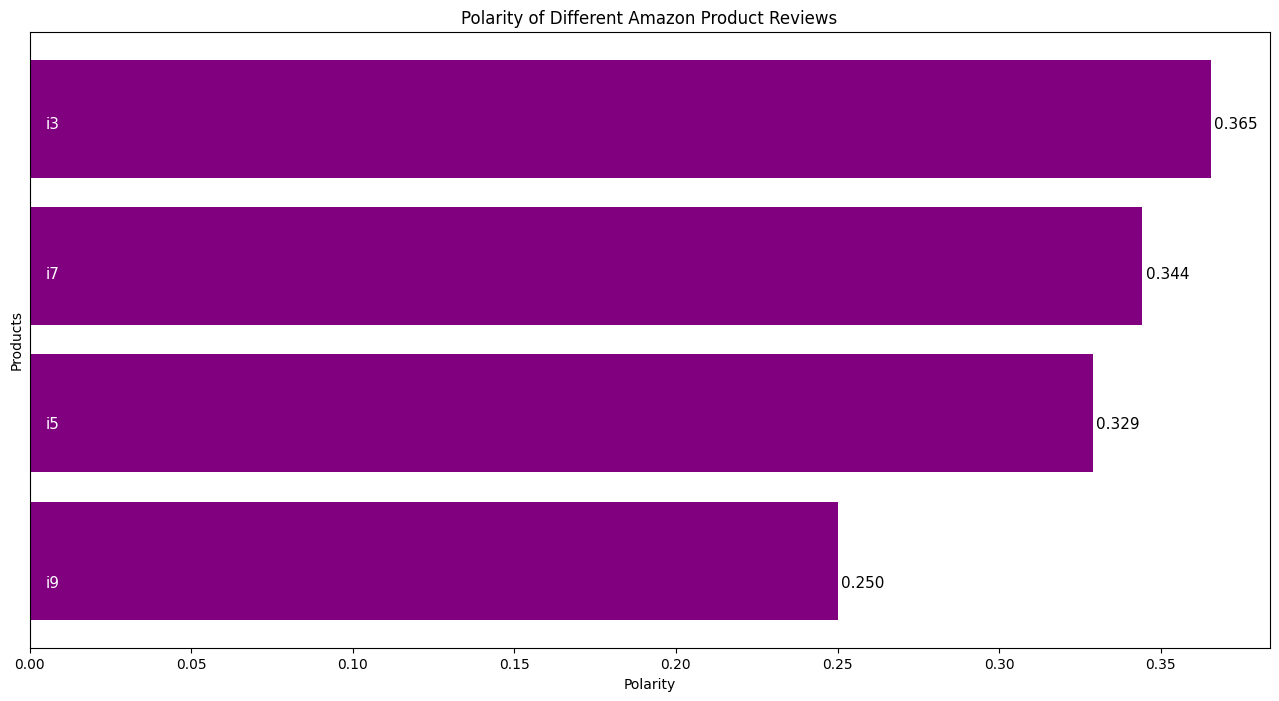

In [34]:
import numpy as np
from textblob import TextBlob
df['polarity']=df['lemmatized'].apply(lambda x:TextBlob(x).sentiment.polarity)

product_polarity_sorted=pd.DataFrame(df.groupby('category')['polarity'].mean().sort_values(ascending=True))

plt.figure(figsize=(16,8))
plt.xlabel('Polarity')
plt.ylabel('Products')
plt.title('Polarity of Different Amazon Product Reviews')
polarity_graph=plt.barh(np.arange(len(product_polarity_sorted.index)),product_polarity_sorted['polarity'],color='purple',)

# Writing product names on bar
for bar,product in zip(polarity_graph,product_polarity_sorted.index):
  plt.text(0.005,bar.get_y()+bar.get_width(),'{}'.format(product),va='center',fontsize=11,color='white')

# Writing polarity values on graph
for bar,polarity in zip(polarity_graph,product_polarity_sorted['polarity']):
  plt.text(bar.get_width()+0.001,bar.get_y()+bar.get_width(),'%.3f'%polarity,va='center',fontsize=11,color='black')
  
plt.yticks([])
plt.show()

In [15]:
def map_sentiment_to_score(sentiment):
    if sentiment == 'Positive':
        return 1
    elif sentiment == 'Neutral':
        return 0
    elif sentiment == 'Negative':
        return -1
    else:
        return None  # Handle unknown sentiments if necessary
df['score'] = df['sentiment'].apply(map_sentiment_to_score)

print(df[['sentiment', 'score']])


     sentiment  score
0     Positive      1
1     Positive      1
2     Positive      1
3     Positive      1
4     Negative     -1
...        ...    ...
2202  Positive      1
2203  Negative     -1
2204  Positive      1
2205  Positive      1
2206  Positive      1

[2207 rows x 2 columns]


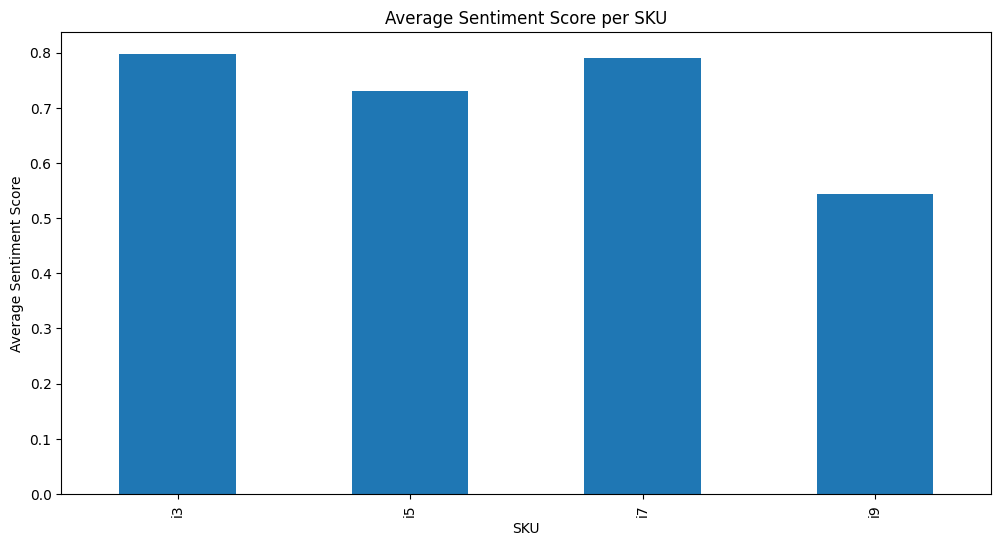

In [16]:
avg_sentiment_sku = df.groupby('category')['score'].mean() 
plt.figure(figsize=(12, 6))
avg_sentiment_sku.plot(kind='bar')
plt.title('Average Sentiment Score per SKU')
plt.xlabel('SKU')
plt.ylabel('Average Sentiment Score')
plt.xticks(rotation=90)
plt.show()

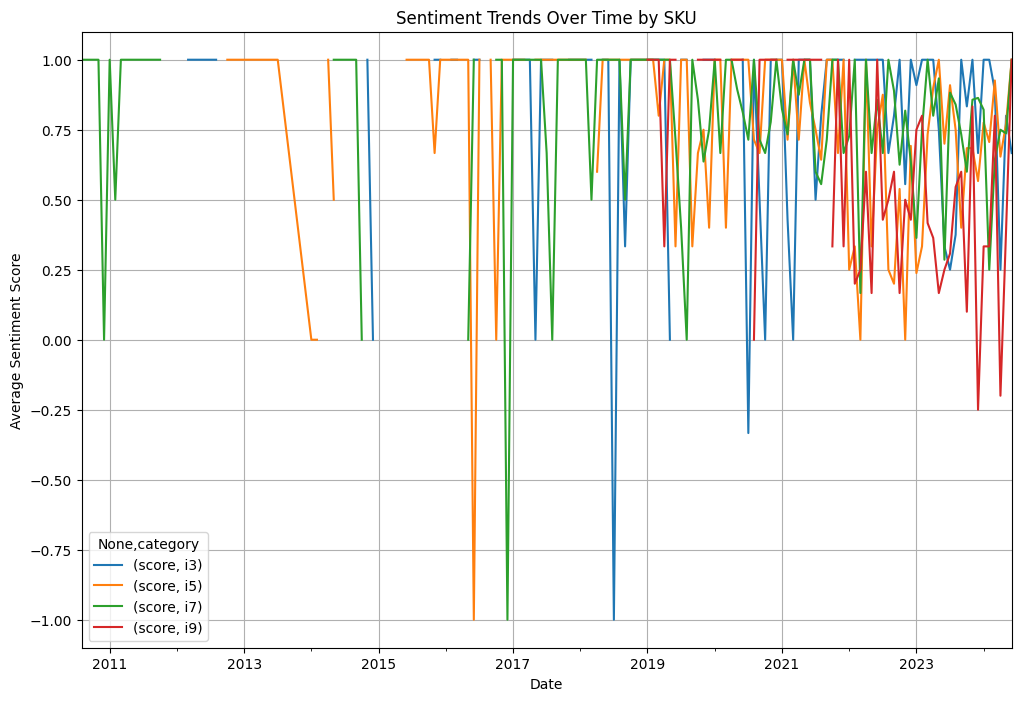

In [18]:
# Group by YearMonth and SKU, calculate mean Sentiment
df['YearMonth'] = df['date'].dt.to_period('M')  # Convert Date to YearMonth period
trend_data = df.groupby(['YearMonth', 'category']).agg({'score': 'mean'}).unstack() ##

# Plotting trends
trend_data.plot(kind='line', figsize=(12, 8))
plt.title('Sentiment Trends Over Time by SKU')
plt.xlabel('Date')
plt.ylabel('Average Sentiment Score')
plt.grid(True)
plt.show()


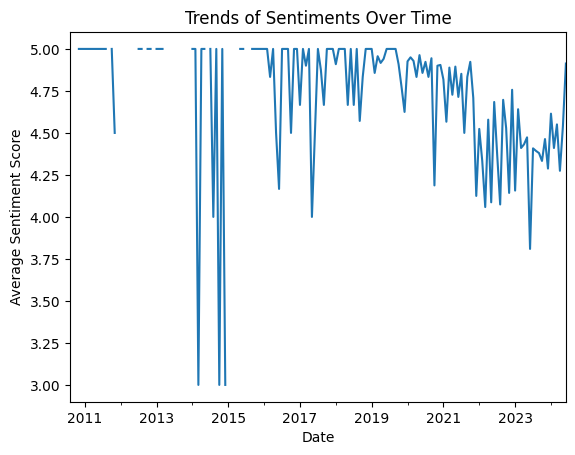

In [19]:
# Trends over time

df.set_index('date', inplace=True)
df['rating'].resample('ME').mean().plot()
plt.title('Trends of Sentiments Over Time')
plt.xlabel('Date')
plt.ylabel('Average Sentiment Score')
plt.show()

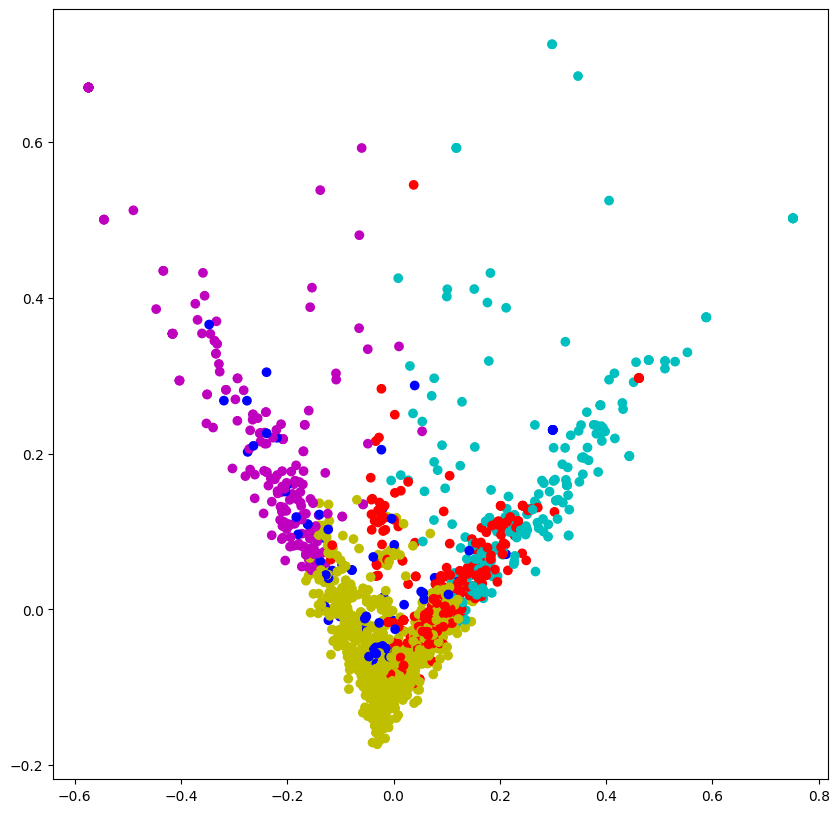

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


# Example TF-IDF vectorization
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['content'])

# K-Means clustering
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(X)

# Add cluster labels to DataFrame
df['Cluster'] = clusters

# Visualize clusters using PCA
pca = PCA(n_components=2)
scatter_plot_points = pca.fit_transform(X.toarray())
colors = ["r", "b", "c", "y", "m"]

x_axis = [o[0] for o in scatter_plot_points]
y_axis = [o[1] for o in scatter_plot_points]
plt.figure(figsize=(10,10))
plt.scatter(x_axis, y_axis, c=[colors[d] for d in clusters])
plt.show()
